## K-Means Clustering Without ML Libraries ##
K-Means Clustering is a machine learning tecnique used in unsupervised learning where we don't have labeled data. I wrote this algorithm without uing any of Machine Learning Libraries.

### How K-Means Clustering Algorithm Works? ###
- First algorithm creates k number of centers randomly.
- Than, all data points are labeled using nearest centers.
- Than, centers are moved to "mean" of their labeled data points.
- Than step 2 and 3 are repeated.

### Import Libraries ###
I use only numpy for math, random for random centers and matplotlib for data visualization

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
 

### Plot the data for each graph ###

### K-Means Clustering Algorithm ###

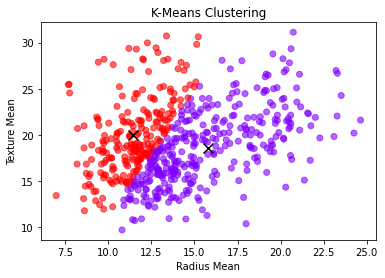

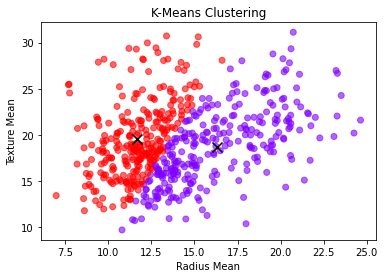

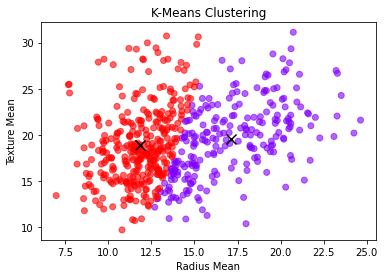

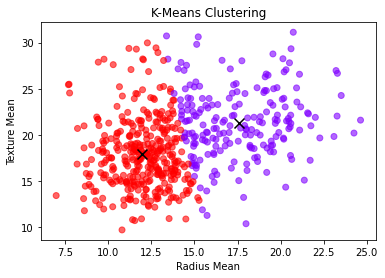

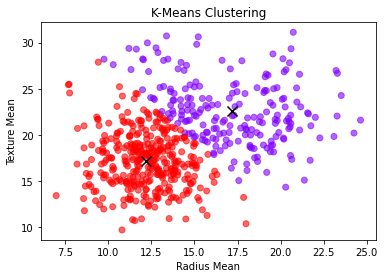

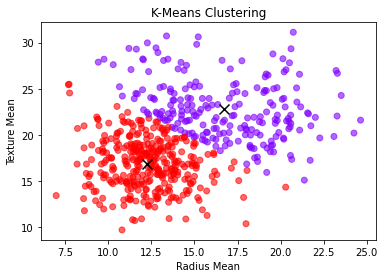

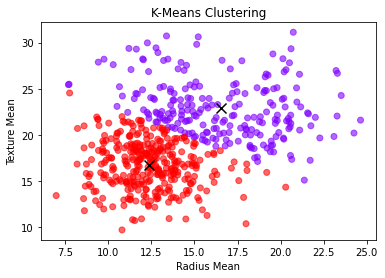

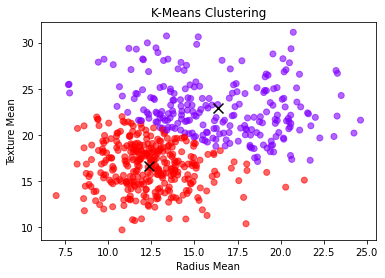

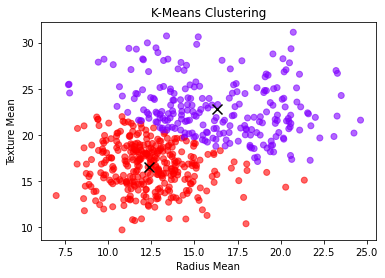

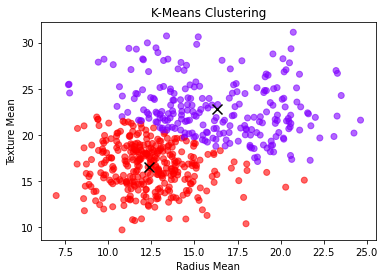

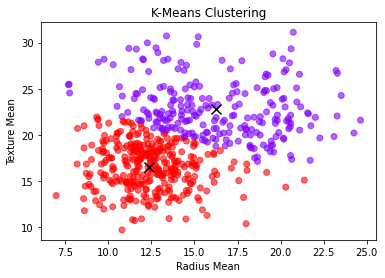

In [5]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from scipy import stats

# Function to initialize centroids
def initialize_centroids(data, k):
    return data.values[random.sample(range(len(data)), k)]

# Function to assign data points to the nearest centroid
def assign_to_nearest_centroid(data, centroids):
    distances = np.linalg.norm(data.values[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# Function to update centroids
def update_centroids(data, labels, k):
    new_centroids = np.array([data.values[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

# Function to remove outliers using Z-score
def remove_outliers(data, z_threshold=3):
    z_scores = np.abs(stats.zscore(data))
    data_no_outliers = data[(z_scores < z_threshold).all(axis=1)]
    return data_no_outliers

# Function for K-Means clustering
def k_means(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)

    for iteration in range(max_iterations):
        labels = assign_to_nearest_centroid(data, centroids)
        new_centroids = update_centroids(data, labels, k)

        if np.all(centroids == new_centroids):
            break

        centroids = new_centroids

        # Display the clustered data at each iteration
        plot_clustered_data(data, centroids, labels)

    return labels, centroids

# Function to plot the data points and centroids
def plot_clustered_data(data, centroids, labels):
    plt.figure(figsize=(6, 4))
    plt.scatter(data['radius_mean'], data['texture_mean'], c=labels, cmap='rainbow', alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100)
    plt.xlabel('Radius Mean')
    plt.ylabel('Texture Mean')
    plt.title('K-Means Clustering')
    plt.show()

# Function to load data, handle missing values, and perform K-Means clustering
def load_data_and_cluster(file_path, K):
    # Load the dataset
    data = pd.read_csv(file_path)

    # Handle missing values by replacing NaN with the median of each feature
    data.fillna(data.median(), inplace=True)

    # Remove outliers from the selected features
    selected_features = ['radius_mean', 'texture_mean']
    data_no_outliers = remove_outliers(data[selected_features])

    # Apply K-Means clustering to the features without outliers
    cluster_labels, final_centroids = k_means(data_no_outliers, K)

# Define the number of clusters (K)
K = 2
file_path=<Enter you data file path>
# Call the function to load data, handle outliers, and perform clustering
load_data_and_cluster(file_path, K)
